# Pandas Expanding and Rolling
* https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

# rolling : 이동평균을 구할 때 사용한다.
# expanding : 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
# 그래프가 표시되도록 하기 위해서는 %matplotlib inline을 꼭 작성해줘야 함

# Series 형태의 실습

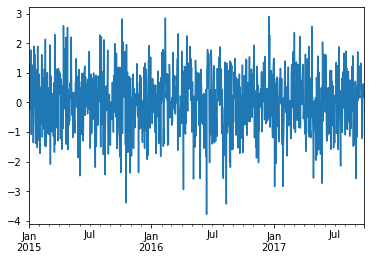

In [4]:
# 2015년1월1일부터 1000일동안의 날짜들에 대하여 랜덤 소수점숫자를 부여
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2015', periods=1000))
s.plot()

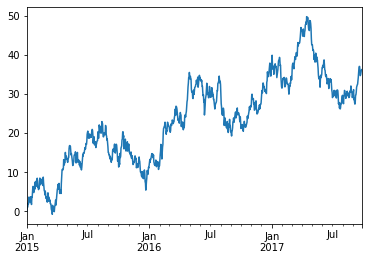

In [5]:
# s의 랜덤한 값들을 누적합으로 더해서 그래프를 그려주었다.
s = s.cumsum()
s.plot()

In [6]:
# rolling : 이동평균을 구할 때 사용한다.
# window에 지정한 크기만큼 값을 이동시켜준다.
r = s.rolling(window=30)
r

Rolling [window=30,center=False,axis=0]

In [7]:
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    31.565475
2017-09-23    31.712822
2017-09-24    31.824329
2017-09-25    32.006055
2017-09-26    32.193168
Freq: D, Length: 1000, dtype: float64

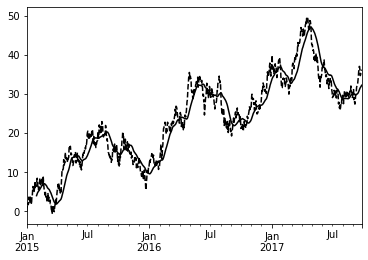

In [8]:
# 이동평균 추세선 그래프 그리기
s.plot(style='k--')
r.mean().plot(style='k')

# Dataframe 형태의 실습

In [9]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A', 'B', 'C', 'D'])

In [10]:
df

,A,B,C,D
2000-01-01,-0.170583,1.155263,-0.495102,0.795089
2000-01-02,-1.101077,0.737111,2.348448,-0.252648
2000-01-03,1.897081,0.420005,-0.178079,-0.040558
2000-01-04,-0.369703,0.443842,-1.581683,0.451749
2000-01-05,-0.657361,0.451123,-0.621073,0.163152
...,...,...,...,...
2002-09-22,1.554699,0.343102,1.620398,1.026885
2002-09-23,0.184388,-0.753114,0.806376,-1.071024
2002-09-24,0.625842,1.061420,0.094557,-0.025524
2002-09-25,0.472699,1.589588,-0.742594,-0.348462


In [11]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.170583,1.155263,-0.495102,0.795089
2000-01-02,-1.271661,1.892374,1.853346,0.542441
2000-01-03,0.625421,2.312379,1.675267,0.501883
2000-01-04,0.255718,2.756220,0.093584,0.953632
2000-01-05,-0.401643,3.207344,-0.527489,1.116784
...,...,...,...,...
2002-09-22,37.114003,-18.983592,22.396040,29.321184
2002-09-23,37.298392,-19.736706,23.202416,28.250160
2002-09-24,37.924234,-18.675286,23.296973,28.224636
2002-09-25,38.396932,-17.085698,22.554378,27.876174


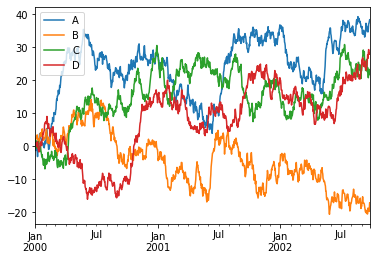

In [12]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A48D74D9E8>,
      dtype=object)

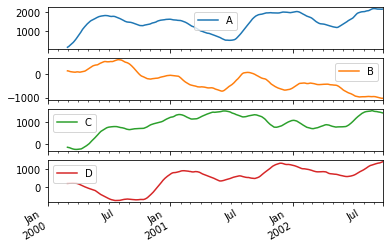

In [13]:
df.rolling(window=60).sum().plot(subplots=True)

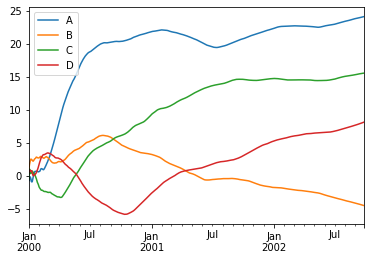

In [14]:
df.rolling(window=len(df), min_periods=1).mean().plot()

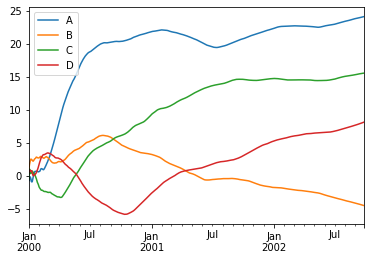

In [15]:
df.expanding(min_periods=1).mean().plot()

In [16]:
df.expanding?

Signature: df.expanding(min_periods=1, center=False, axis=0)
Docstring:
Provide expanding transformations.

.. versionadded:: 0.18.0

Parameters
----------
min_periods : int, default 1
    Minimum number of observations in window required to have a value
    (otherwise result is NA).
center : bool, default False
    Set the labels at the center of the window.
axis : int or str, default 0

Returns
-------
a Window sub-classed for the particular operation

See Also
--------
rolling : Provides rolling window calculations.
ewm : Provides exponential weighted functions.

Notes
-----
By default, the result is set to the right edge of the window. This can be
changed to the center of the window by setting ``center=True``.

Examples
--------

>>> df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
     B
0  0.0
1  1.0
2  2.0
3  NaN
4  4.0

>>> df.expanding(2).sum()
     B
0  NaN
1  1.0
2  3.0
3  3.0
4  7.0
File:      c:\users\user\anaconda3\lib\site-packages\pandas\core\generic.py
Type:      method


In [17]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


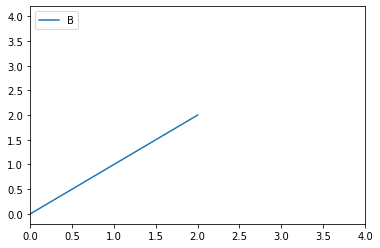

In [18]:
dfe.plot()

In [19]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


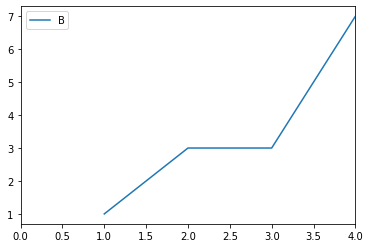

In [20]:
dfe.expanding(2).sum().plot()